Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
class Neural_Network:
    def __init__(self,inputlayerNeuron=2,HiddenlayerNeuron1=5,HiddenlayerNeuron2=6):

        outputlayerNeuron=1
        self.learning_rate=0.02
        self.Weight_Input_Hidden1=np.random.randn(inputlayerNeuron,HiddenlayerNeuron1)
        self.Weight_Hidden1_Hidden2=np.random.randn(HiddenlayerNeuron1,HiddenlayerNeuron2)
        self.Weight_Hidden2_Output=np.random.randn(HiddenlayerNeuron2,outputlayerNeuron)
     
    
    def forwardProp(self,Input):
        self.hiddenLayer1Input=np.dot(Input,self.Weight_Input_Hidden1)
        self.hiddenLayer1Output=self.Sigmoid(self.hiddenLayer1Input)

        self.hiddenLayer2Input=np.dot(self.hiddenLayer1Output,self.Weight_Hidden1_Hidden2)
        self.hiddenLayer2Output=self.Sigmoid(self.hiddenLayer2Input)
        
        self.outputLayer_Input=np.dot(self.hiddenLayer2Output,self.Weight_Hidden2_Output)
        self.outputLayer_Output=self.Sigmoid(self.outputLayer_Input)

        pred=self.outputLayer_Output
        return pred


    def BackProp(self,input,target,pred):
        output_error=target-pred
        output_delta=self.learning_rate*output_error*self.Sigmoid_Deriv(pred)

        hiddenLayer2_error=np.dot(output_delta,self.Weight_Hidden2_Output.T)
        hiddenLayer2_delta=self.learning_rate*hiddenLayer2_error*self.Sigmoid_Deriv(self.hiddenLayer2Output)

        hiddenLayer1_error=np.dot(hiddenLayer2_delta,self.Weight_Hidden1_Hidden2.T)
        hiddenLayer1_delta=self.learning_rate*hiddenLayer1_error*self.Sigmoid_Deriv(self.hiddenLayer1Output)

        self.Weight_Input_Hidden1 += np.dot(input.T,hiddenLayer1_delta)

        self.Weight_Hidden1_Hidden2 +=np.dot(self.hiddenLayer1Output.T,hiddenLayer2_delta)

        self.Weight_Hidden2_Output +=np.dot(self.hiddenLayer2Output.T,output_delta)



    def Sigmoid(self,x):
        return (1/(1+np.exp(-x)))

    def Sigmoid_Deriv(self,sig):
        return sig*(1-sig)
    
    def ErrMean(self,input,target):
        return np.mean(target-self.forwardProp(input))

    def train(self,Input,target):
        output=self.forwardProp(Input)
        self.BackProp(Input,target,output)


    

[0.46139611]


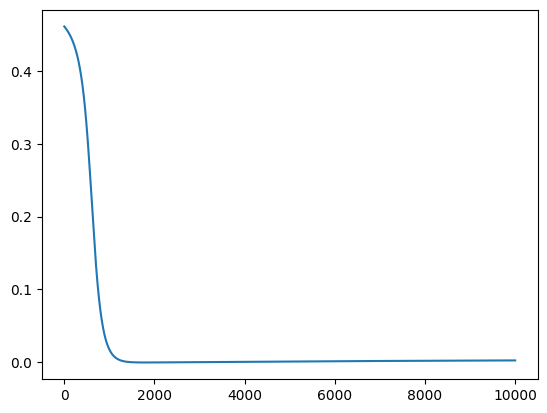

In [3]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])
err=[]
nn=Neural_Network()
for i in range(10000):
    nn.train(X,Y)
    err.append(nn.ErrMean(X,Y))

plt.plot(err)
print(nn.forwardProp([1,1]))

In [14]:
# z=np.random.randn(2,3)
# print(z)
# m=z.dot(np.array([[1],[2],[3]]))
# print(m)
# print(np.dot(z,np.array([[1],[2],[3]])))

adic={3:[0.3,0.35,982],5:[0,3.21,36.5,9.8]}
print(adic.items())

dict_items([(3, [0.3, 0.35, 982]), (5, [0, 3.21, 36.5, 9.8])])
